<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общая-информация." data-toc-modified-id="Общая-информация.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общая информация.</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-названий-столбцов-и-поиск-дубликатов" data-toc-modified-id="Замена-названий-столбцов-и-поиск-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена названий столбцов и поиск дубликатов</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Суммарные-продажи-во-всех-регионах" data-toc-modified-id="Суммарные-продажи-во-всех-регионах-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Суммарные продажи во всех регионах</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Портрет-пользователя-каждого-региона" data-toc-modified-id="Портрет-пользователя-каждого-региона-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Портрет пользователя каждого региона</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Анализ успешности видео игр

В нашем распоряжении данные интернет-магазина «Стримчик», который продаёт по всему миру видео игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
План работ:
- Предобработка данных:
  - корректировка названий столбцов;
  - преобразовние данных в нужные типы;
  - обработка пропусков.
- Исследовательский анализ данных.
- Портрет пользователя каждого региона.
- Проверка гипотез:
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
- Общий вывод.

Описание данных:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Общая информация. 

In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from IPython.display import display
from scipy import stats as st

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


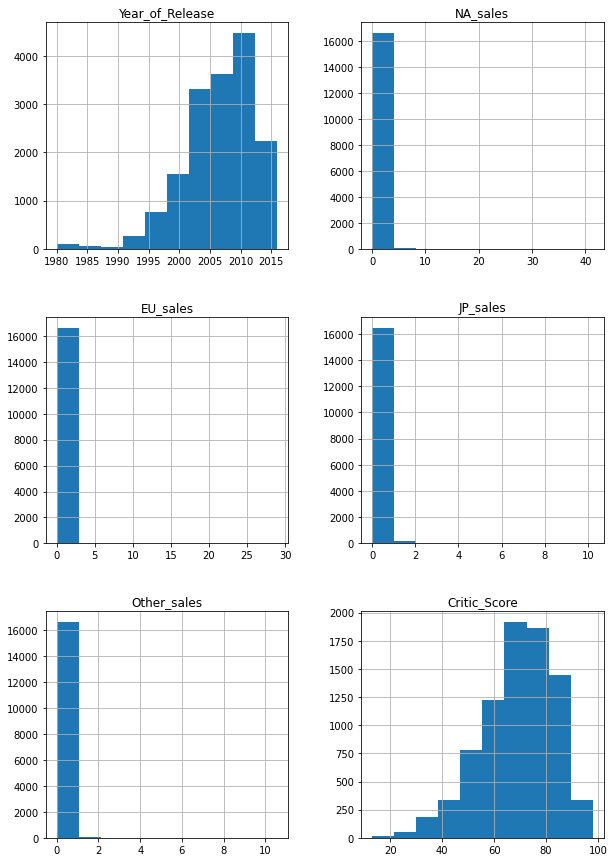

In [5]:
df.hist(figsize=(10, 15));

## Предобработка данных

### Замена названий столбцов и поиск дубликатов

In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.duplicated().sum()

0

Явных дубликатов в данных не обнаружено.

### Преобразование типов данных

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df['year_of_release'] = df['year_of_release'].astype('Int64')
df['critic_score'] = df['critic_score'].astype('Int64')

Изменили тип данных в колонках 'year_of_release' и 'critic_score' c вещественного на целочисленный.

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке 'user_score' видим оценку 'tbd', это сокращение, которое часто используется в сфере компьютерных игр  и расшифровывается - To Be Determined, то есть "Будет определено", в нашем случае это касаеться оценки пользователей. Для дальнейшего анализа данных заменим аббревиатуру 'tbd' на -1.

In [11]:
len(df.query('user_score == "tbd"'))

2424

In [12]:
df['user_score'] = df['user_score'].replace('tbd', '-1')

Теперь можем изменить тип данных в колонке 'user_score' с object на float, чтобы можно было производить математические операции с этой колонкой.

In [13]:
df['user_score'] = df['user_score'].astype('float')

### Обработка пропусков

In [14]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Строки с пропусками в колонке 'name' удалим, так как название играет важную роль в анализе, пропуски в колонке 'genre' удалятся совместно с 'name'. Так же поступим с пропусками в колонке  'year_of_release' .

In [15]:
df = df.dropna(subset=['name', 'year_of_release']).reset_index(drop=True)

In [16]:
df_old = pd.read_csv('/datasets/games.csv')
print(F'Доля удаленных данных составила {(1-len(df)/len(df_old)):.2%}')

Доля удаленных данных составила 1.62%


In [17]:
len(df.query('critic_score.isna()  and user_score.isna() and rating.isna()'))

6534

Подсчитаем строки в которых пропущены значения и 'critic_score' и 'user_score' и 'rating'. Видим, что в большинстве случаев пропущена не одна, а все три оценки, возможно причина пропуска это технический сбой.                                

In [18]:
df['critic_score'].unique()

<IntegerArray>
[  76, <NA>,   82,   80,   89,   58,   87,   91,   61,   97,   95,   77,   88,
   83,   94,   93,   85,   86,   98,   96,   90,   84,   73,   74,   78,   92,
   71,   72,   68,   62,   49,   67,   81,   66,   56,   79,   70,   59,   64,
   75,   60,   63,   69,   50,   25,   42,   44,   55,   48,   57,   29,   47,
   65,   54,   20,   53,   37,   38,   33,   52,   30,   32,   43,   45,   51,
   40,   46,   39,   34,   41,   36,   31,   27,   35,   26,   19,   28,   23,
   24,   21,   17,   13]
Length: 82, dtype: Int64

In [19]:
df['user_score'].unique()

array([ 8. ,  nan,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5, -1. ,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,
        4.9,  4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,
        4.4,  4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,
        2.5,  1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,
        3.8,  0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,
        2.3,  0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В колонках 'critic_score', 'user_score' нет отрицательных значений, заполним пропуски цифрой -1, чтобы упростить дальнейшую работу с данными, но при этом понимать где пропущенны данные и учитывать это в анализе.

In [21]:
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(-1)

Рейтинговая система ERSB применяется для игр выпущенных в США и Канаде, потому возникли пропуски в колонке 'rating' игр выпущенных в других странах, заменим пропуски на значение 'ND'.

In [22]:
df['rating'] = df['rating'].fillna('ND')

### Суммарные продажи во всех регионах

In [23]:
df['global_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [24]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  global_sales     16444 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Исследовательский анализ данных

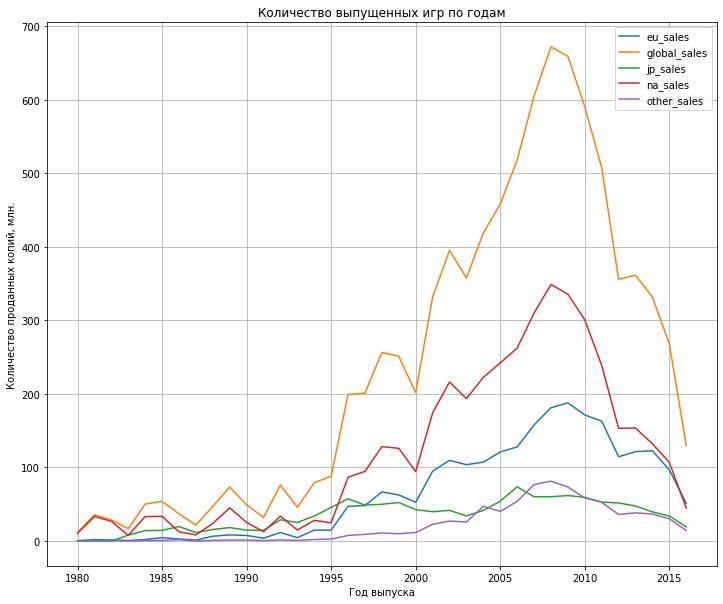

In [25]:
df.pivot_table(index='year_of_release', values = ['na_sales', 'eu_sales', 'jp_sales', \
'other_sales', 'global_sales'], aggfunc='sum').plot(figsize=(12,10), title='Количество выпущенных игр по годам', grid=True)
plt.xlabel("Год выпуска")
plt.ylabel("Количество проданных копий, млн.");

Видим, что в период с 1980-2008 год идет рост количества выпущенных игр по всем регионам. После 2008 го идет спад, это связано с широким распространением мобильных телефонов и планшетов и следственно игр на этих устройствах, в том числе и бесплатных, что в свою очередь снизило спрос на видео игры. Период с 1980 по 2008 год для анализа использовать не целесообразно, так как кардинально изменились и условия на рынке компьютерных игр и уровень технологий.

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

In [26]:
df_platform = df.pivot_table(index='platform', values= 'global_sales', aggfunc='sum').\
sort_values(by='global_sales', ascending=False)
platform_max_sales = list(df_platform.index[:10])

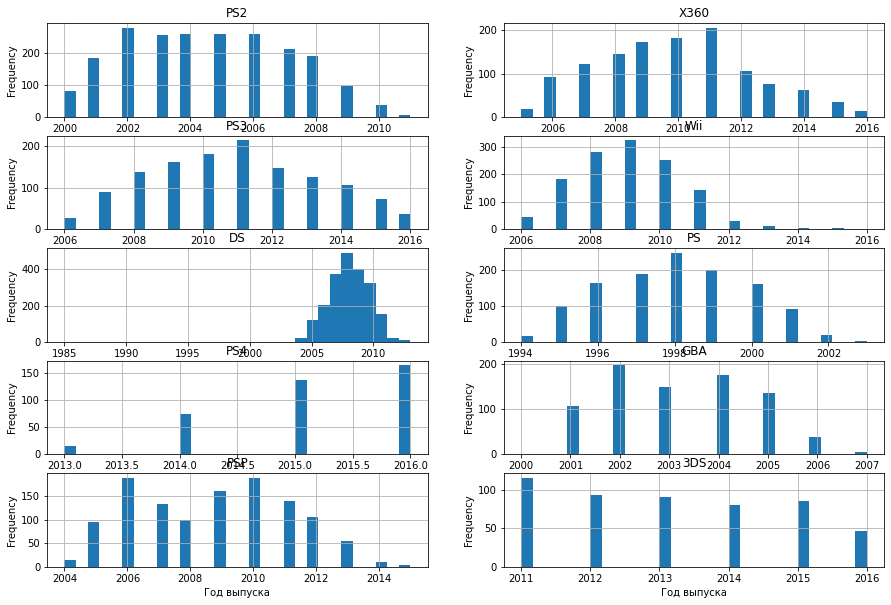

In [27]:
plt.figure(figsize=(15,10))
x=1
for t in platform_max_sales:
    plt.subplot(5,2,x)
    df.query('platform == @t')['year_of_release'].plot(kind='hist', title=t, grid=True, bins=30)
    plt.xlabel("Год выпуска")
    x+=1

In [28]:
platform_life = df.query('platform == @platform_max_sales').pivot_table(index='platform', \
values='year_of_release', aggfunc=['min', 'max']).reset_index()
platform_life.columns = ['platform', 'first_year', 'last_year']
platform_life['duration'] = platform_life['last_year'] - platform_life['first_year']

In [29]:
platform_life['duration'].describe()

count    10.000000
mean     10.500000
std       6.737128
min       3.000000
25%       7.500000
50%      10.000000
75%      11.000000
max      28.000000
Name: duration, dtype: float64

Средний срок жизни платформы из списка топовых платформ составляет 13 лет, медианный 10. Судя по графикам больше всего релизов происходит примерно в средине этого периода, следственно актуальными можно считать платформы не старше 5 лет, которые находяться на пике своей производительности.

Отсечем все данные позже 2012 го года и исследуем распределение релизов по годам для платформ с наибольшими суммарными продажами.

In [30]:
df_actual = df.query('year_of_release >= 2012')

In [31]:
df_platform_act = df_actual.pivot_table(index='platform', values= 'global_sales', aggfunc='sum').\
sort_values(by='global_sales', ascending=False)
platform_act = list(df_platform_act.index[:10])
platform_act

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

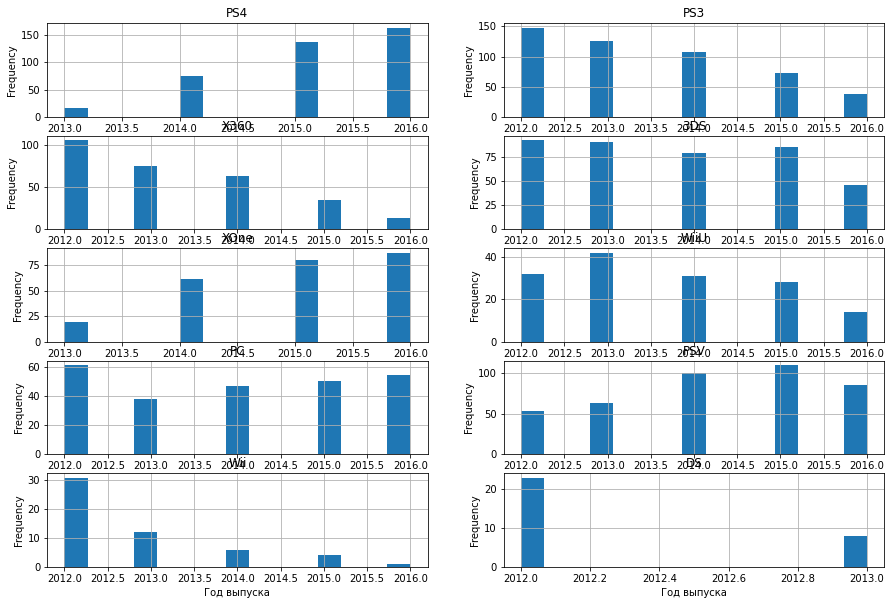

In [32]:
plt.figure(figsize=(15,10))
x=1
for t in platform_act:
    plt.subplot(5,2,x)
    df_actual.query('platform == @t')['year_of_release'].plot(kind='hist', title=t, grid=True, bins=15)
    plt.xlabel("Год выпуска")
    x+=1

Видим, что PS4 и XOne находяться в стадии роста выпуска релизов, для РС стабильно выходят релизы, платформы 3DS, WiiU, PSV перешагнули свой пик популярности но еще держаться на плаву. PS3, X360, Wii, DS находяться в конце жизненого цикла.
Посмотрим графики продаж по годам.

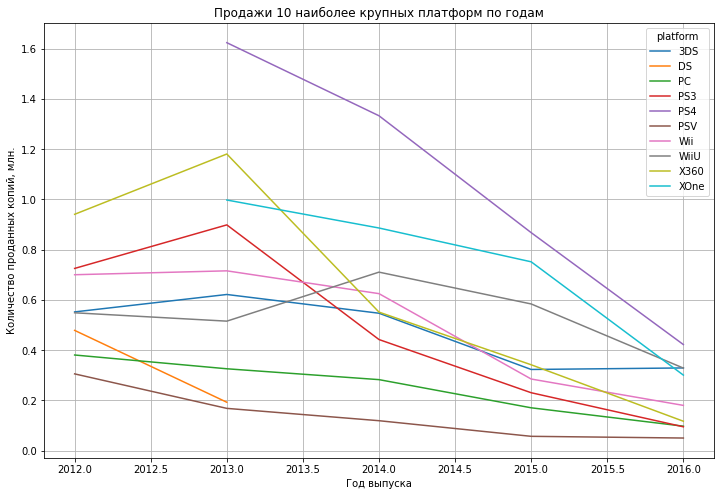

In [33]:
df_actual.query('platform == @platform_act').pivot_table(index='year_of_release', columns='platform', values='global_sales').\
plot(grid=True, figsize=(12,8), title='Продажи 10 наиболее крупных платформ по годам');
plt.xlabel("Год выпуска")
plt.ylabel("Количество проданных копий, млн.");

На графике суммарных продаж по годам, почти все платформы упали в прибыли. Ударники по релизам PS4 и ХOne лидируют и по продажам, у РС так же наблюдаеться падение но менее резкое, чем у других платформ, у 3DS наблюдается небольшой рост продаж за последний год. У WiiU и PSV так же видим падение продаж, но объемы продаж у WiiU значительно превышают PSV. Потенциально прибыльными платформами будем считать PS4, XOne, PC, 3DS и WiiU. Примем актуальный период с 2013 года, когда все данные платформы уже вышли.

In [34]:
platform_profit = ['PS4', 'XOne', 'PC','3DS', 'WiiU']
df_actual = df.query('year_of_release >= 2013')

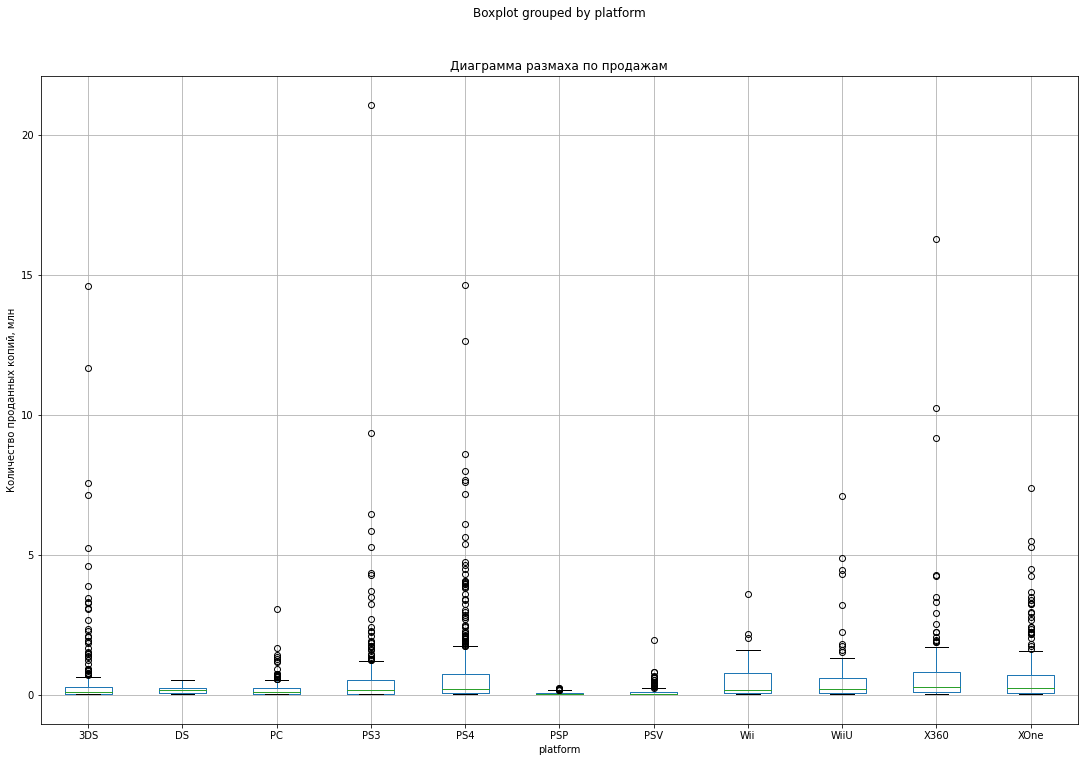

In [35]:
df_actual.boxplot(column='global_sales', by='platform', figsize=(18,12))
plt.title('Диаграмма размаха по продажам')
plt.ylabel('Количество проданных копий, млн');

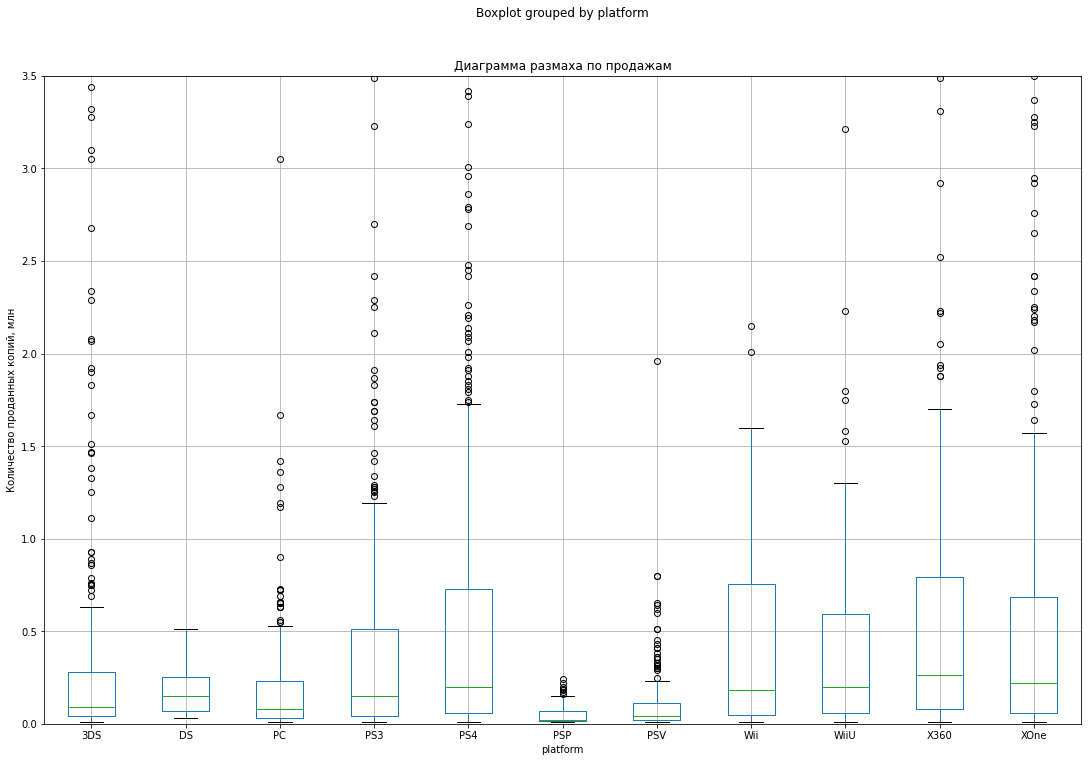

In [36]:
df_actual.boxplot(column='global_sales', by='platform',  figsize=(18,12))
plt.title('Диаграмма размаха по продажам')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0,3.5);

Дополнительно создадим таблицу с количеством, сумой продаж, медианой и средним.

In [37]:
df_actual.pivot_table(index = 'platform', values= 'global_sales',\
                                                            aggfunc=['count','sum', 'mean', 'median']).style.format("{:,.2f}")

,count,sum,mean,median
,global_sales,global_sales,global_sales,global_sales
platform,,,,
3DS,303.00,143.25,0.47,0.09
DS,8.00,1.54,0.19,0.15
PC,189.00,39.43,0.21,0.08
PS3,345.00,181.43,0.53,0.15
PS4,392.00,314.14,0.80,0.20
PSP,67.00,3.50,0.05,0.02
PSV,358.00,32.99,0.09,0.04
Wii,23.00,13.66,0.59,0.18


На диаграмме видим, что наиболее популярными платформами является PS4, X360, Wii, XOne.  Выбросы после верхнего уса, в данном случае это отдельные удачные игры, которые стали хитами.  Больше всего таких выбросов у платформы PS4, что и сделал ее абсолютным лидером по объемам продаж. Наименее популярная платформа PSP в выбранный актуальный период доживают свои последние годы.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. 

In [38]:
df_ps4 = df_actual.query('platform == "PS4"')

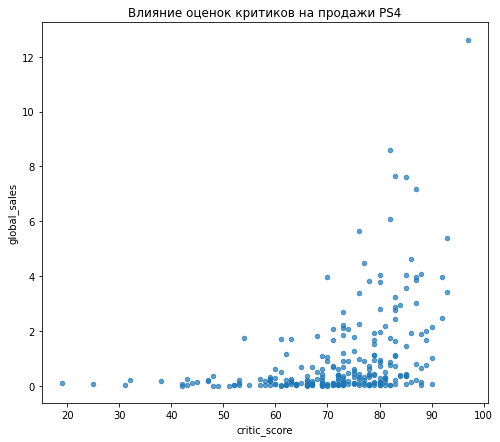

In [39]:
df_ps4.query('critic_score!=-1').plot(kind='scatter', x='critic_score', y='global_sales', figsize=(8, 7), alpha=0.7)
plt.title('Влияние оценок критиков на продажи PS4');

In [40]:
df_ps4.loc[df_ps4['critic_score']!=-1, ['critic_score', 'global_sales']].corr().style.format("{:,.2f}")

,critic_score,global_sales
critic_score,1.00,0.41
global_sales,0.41,1.00


Завсисимость продаж от отзывов критиков есть но достаточно слабая, есть отдельные выбросы на продажи которых повлияли оценки критиков, коэффициент кореляции 0.41 подтверждает это. 

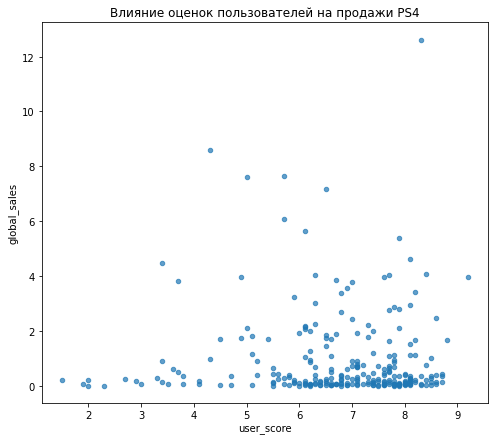

In [41]:
df_ps4.query('user_score!=-1').plot(kind='scatter', x='user_score', y='global_sales', figsize=(8, 7), alpha=0.7)
plt.title('Влияние оценок пользователей на продажи PS4');

In [42]:
df_ps4.query('user_score != -1')[['user_score', 'global_sales']].corr().style.format("{:,.2f}")

,user_score,global_sales
user_score,1.00,-0.03
global_sales,-0.03,1.00


Зависимости продаж от оценок пользователей нет, коэффициент кореляции -0.03, на диаграме так же видим отдельные выбросы с высокими оценками и большими объемами продаж, но основная масса  от оценок не зависит. Не все пользователи пишут отзывы и ставят оценки, не все и руководствуются чьими либо оценками для выбора игры. Так же есть полюбившиеся пользователям серии на подобие Call of Duty, Final fantasy или FIFA, релизы которых пользователи ждут и купят независимо от оценок пользователей и критиков.

Соотнесем выводы с продажами игр на других платформах.

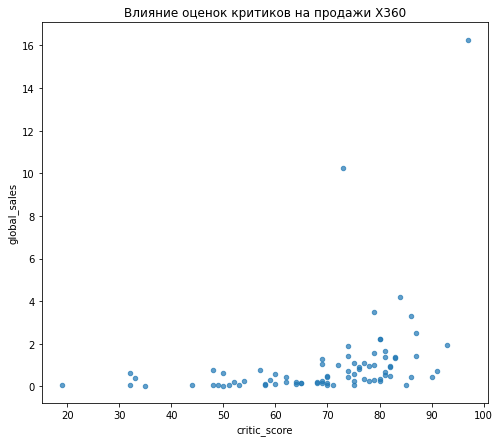

X360


,critic_score,global_sales
critic_score,1.000000,0.350345
global_sales,0.350345,1.000000


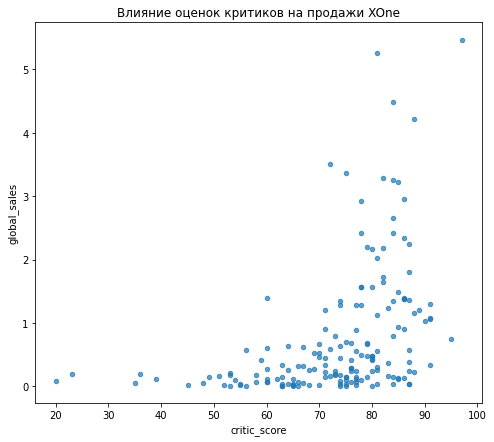

XOne


,critic_score,global_sales
critic_score,1.000000,0.416998
global_sales,0.416998,1.000000


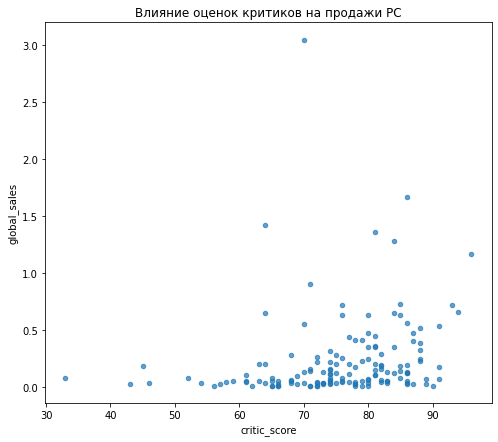

PC


,critic_score,global_sales
critic_score,1.00000,0.19603
global_sales,0.19603,1.00000


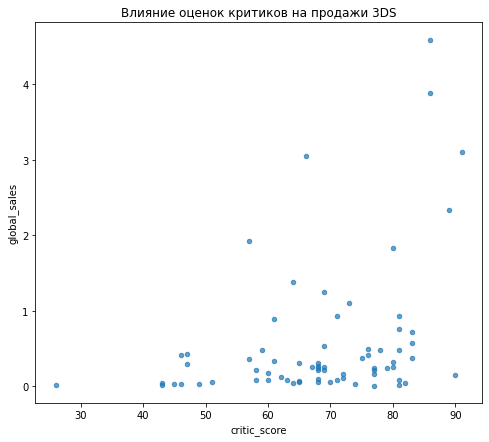

3DS


,critic_score,global_sales
critic_score,1.000000,0.357057
global_sales,0.357057,1.000000


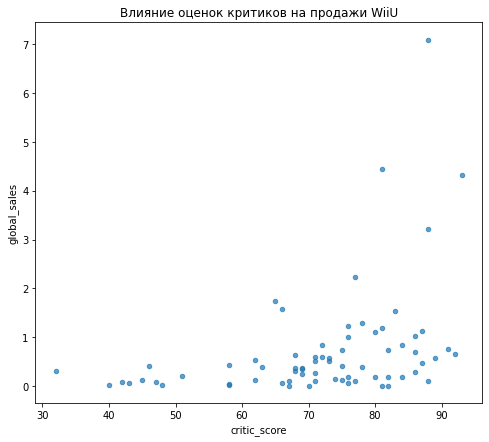

WiiU


,critic_score,global_sales
critic_score,1.000000,0.376415
global_sales,0.376415,1.000000


In [43]:
 for t in ['X360', 'XOne', 'PC','3DS', 'WiiU']:
    df_new = df_actual.query('platform == @t and critic_score!=-1')
    df_new.plot(kind='scatter', x='critic_score', y='global_sales', figsize=(8, 7), alpha=0.7)
    plt.title(f'Влияние оценок критиков на продажи {t}')
    plt.show()
    print(t)
    display(df_new[['critic_score', 'global_sales']].corr()) 
    

Завсисимость продаж от отзывов критиков есть но как и для PS4 достаточно слабая, есть отдельные выбросы на продажи которых повлияли оценки критиков. У платформы PC зависимости от оценки критиков почти нет, персональные компьютеры это самая стабильная платформа.  

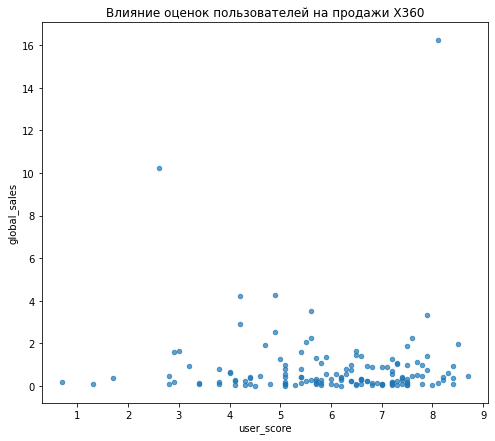

X360


,user_score,global_sales
user_score,1.000000,-0.011742
global_sales,-0.011742,1.000000


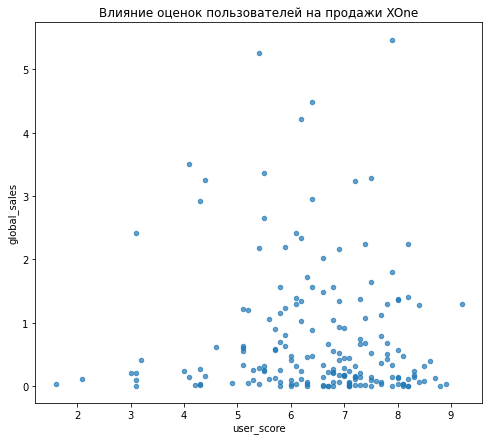

XOne


,user_score,global_sales
user_score,1.000000,-0.068925
global_sales,-0.068925,1.000000


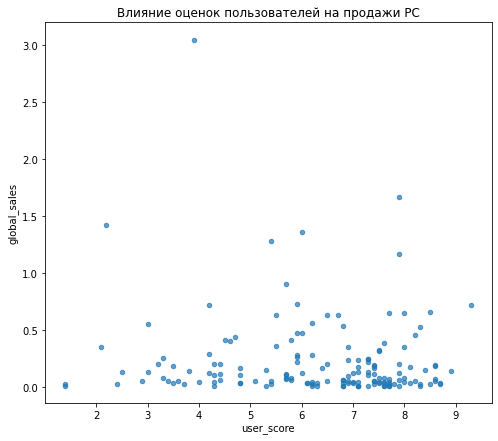

PC


,user_score,global_sales
user_score,1.000000,-0.093842
global_sales,-0.093842,1.000000


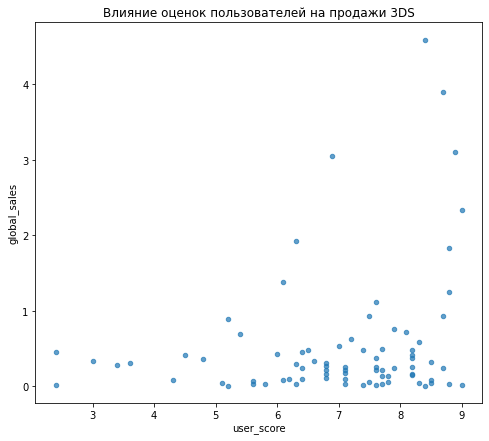

3DS


,user_score,global_sales
user_score,1.000000,0.241504
global_sales,0.241504,1.000000


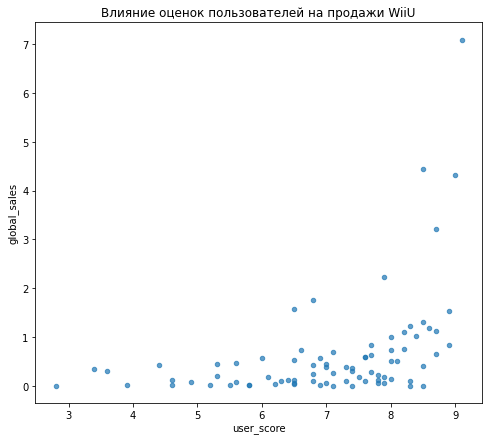

WiiU


,user_score,global_sales
user_score,1.00000,0.41933
global_sales,0.41933,1.00000


In [44]:
 for t in ['X360', 'XOne', 'PC','3DS', 'WiiU']:
    df_new = df_actual.query('platform == @t and user_score!=-1')
    df_new.plot(kind='scatter', x='user_score', y='global_sales', figsize=(8, 7), alpha=0.7)
    plt.title(f'Влияние оценок пользователей на продажи {t}')
    plt.show()
    print(t)
    display(df_new[['user_score', 'global_sales']].corr())

 Для большинства платформ аналогично с PS4, зависимости продаж от оценок пользователей нет. Для платформ 3DS и WiiU слабая зависимость все таки есть, возможно это связано с тем, что обе эти платформы производятся компанией Nintendo, либо с большим количеством пропусков в колонке 'user_score'.

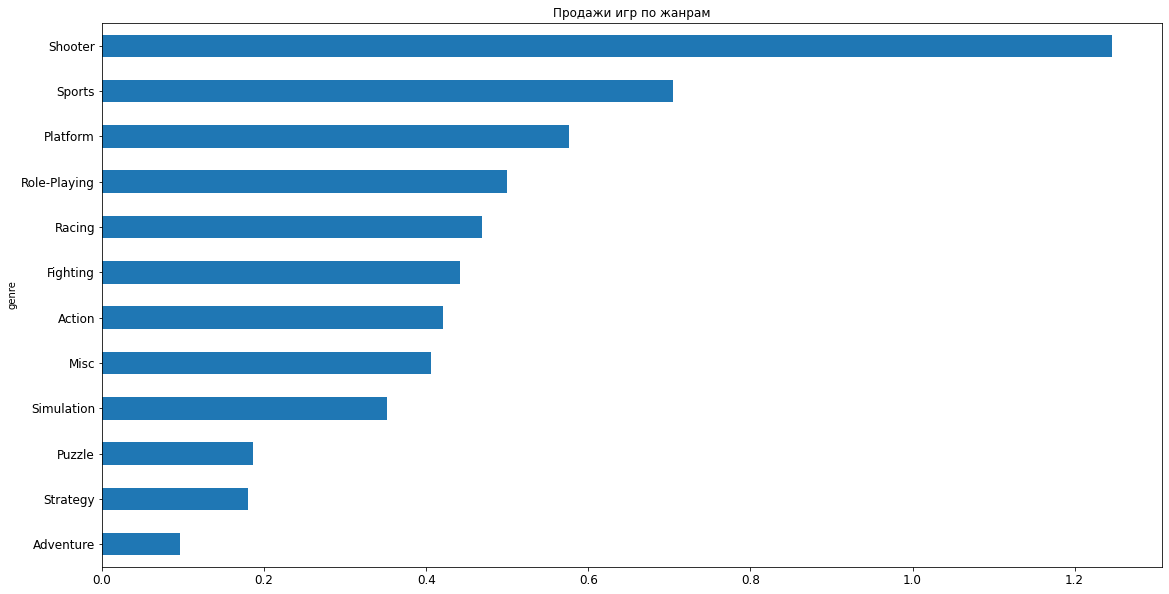

In [45]:
df_actual.pivot_table(index='genre', values='global_sales').sort_values(by='global_sales').plot(kind= 'barh', \
figsize=(19,10), legend = False, fontsize = 12, title='Продажи игр по жанрам');

In [46]:
df_actual.query('genre== "Shooter"').sort_values(by='global_sales', ascending = False)[['name', 'global_sales']].head()

,name,global_sales
31,Call of Duty: Black Ops 3,14.63
60,Call of Duty: Ghosts,10.24
69,Call of Duty: Ghosts,9.36
87,Star Wars Battlefront (2015),7.98
92,Call of Duty: Advanced Warfare,7.66


In [47]:
df_actual.query('genre== "Sports"').sort_values(by='global_sales', ascending = False)[['name', 'global_sales']].head()

,name,global_sales
77,FIFA 16,8.58
94,FIFA 17,7.60
126,FIFA 14,6.46
143,FIFA 15,6.08
263,FIFA 15,4.28


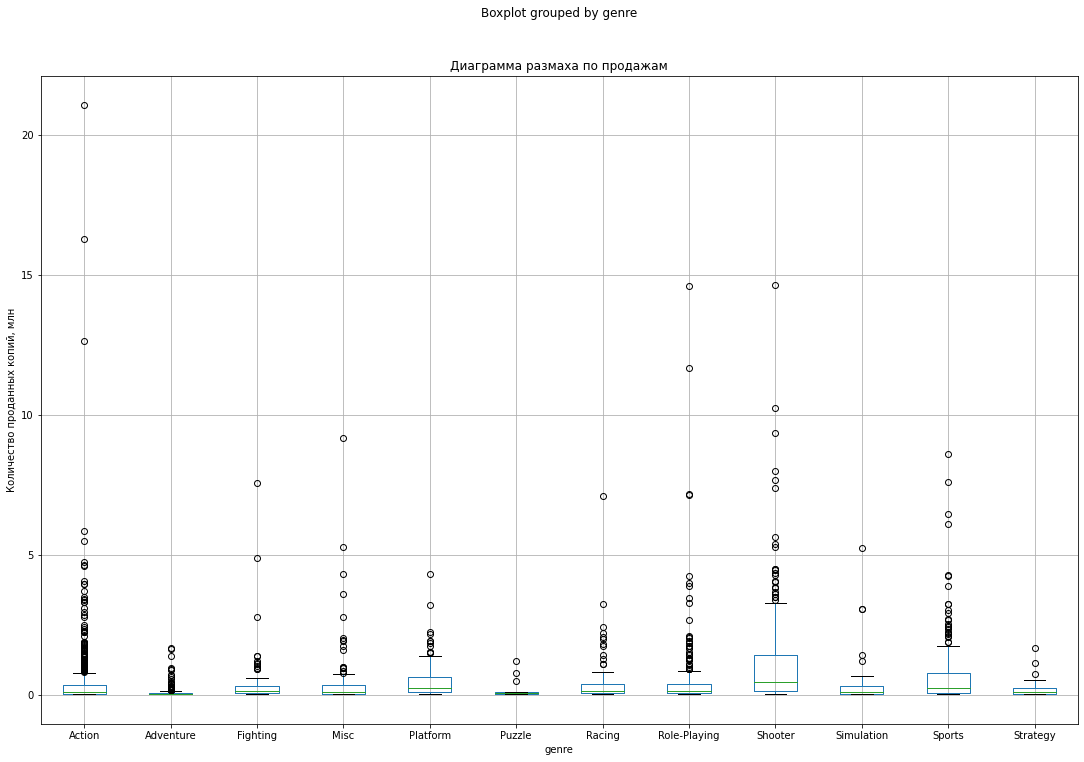

In [48]:
df_actual.boxplot(column='global_sales', by='genre', figsize=(18,12))
plt.title('Диаграмма размаха по продажам')
plt.ylabel('Количество проданных копий, млн');

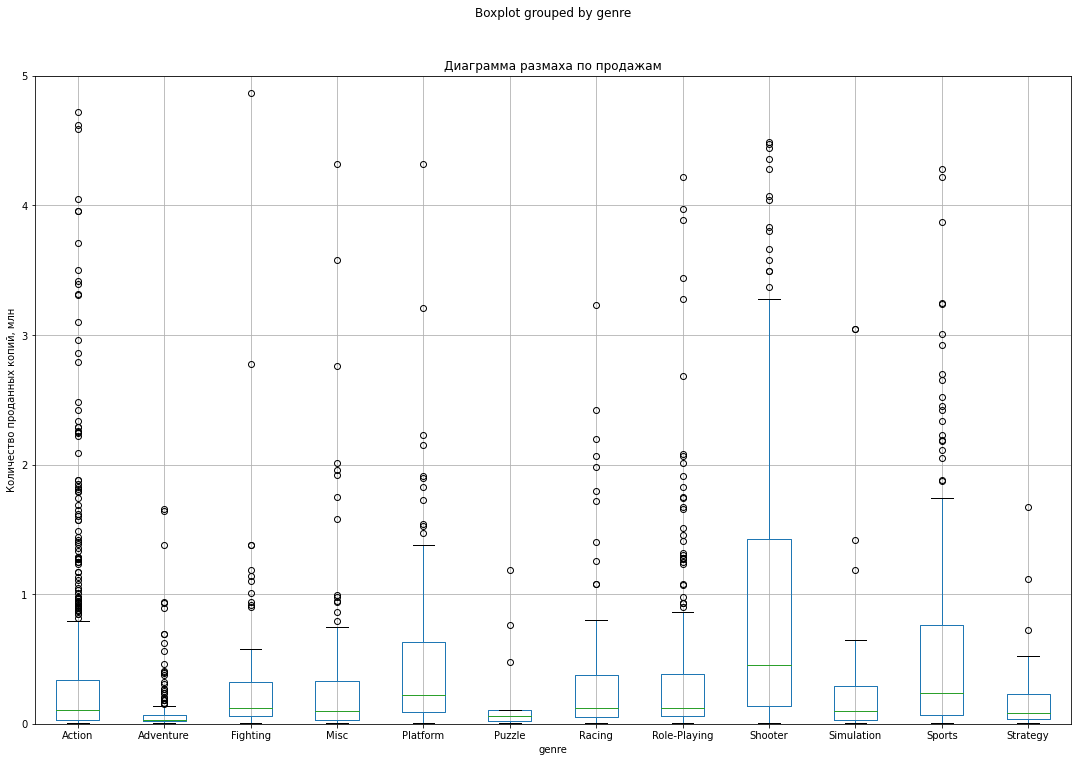

In [49]:
df_actual.boxplot(column='global_sales', by='genre', figsize=(18,12))
plt.title('Диаграмма размаха по продажам')
plt.ylabel('Количество проданных копий, млн')
plt.ylim(0,5);

Самым прибыльным жанром можно считать жанр "Shooter", в пятерке самых продаваемых игр этого жанра видим легендарную "Call of Duty", следующий по продажам жанр "Sports", в этом жанре всю пятерку лидеров занимает "FIFA". На диаграмме размаха видим, что прибыльность жанров "Shooter" и "Sports" обусловленна не только удачными бестселлерами, но и стабильными продажами основного сегмента игр. Предполагаю, что лидерство игр жанра "Shooter" вызвано психологическим фактором, так как 'стрелялки' хороший способ снять стресс.  Наименее продаваемые  игры принадлежат к жанру "Adventure". 

## Портрет пользователя каждого региона

Посмотрим на доли продаж пяти самых популярных платформ в Северной америке, Европе и Японии.

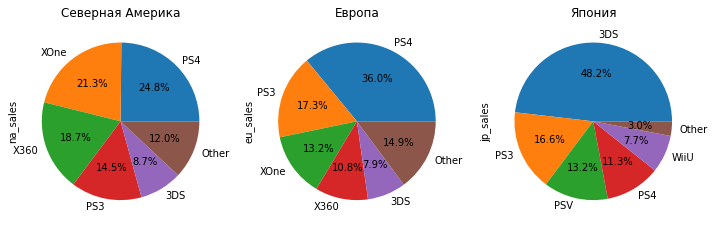

In [50]:
region=df_actual.columns[4:7]
fig, axs=plt.subplots(1,3, figsize=(12,12))
title=['Северная Америка', 'Европа', 'Япония']
for t in range(3):
    df_t=(df_actual.groupby('platform')[region[t]].sum().reset_index().
         sort_values(region[t], ascending=False, ignore_index = True).head(5))
    df_t=df_t.append({'platform':'Other', region[t]: df_actual[region[t]].sum() - df_t[region[t]].sum()},ignore_index=True)
    df_t.plot(kind='pie', y=region[t], legend=False, labels=df_t['platform'],  autopct='%1.1f%%', ax=axs[t], title=title[t]) 
plt.show();    
    

В Северной Америке по продажам лидируют PS4, производства японской компании Sony, XOne от американской компании ХBOX, в  европейском регионе безусловный лидер тоже PS4.  В Японии же почти половина всех продаж приходится на 3DS, а популярный в Европе и Америке PS4 на 4м месте, хотя и Nintendo и Sony японские компании, возможно это связано с тем, что PS4 относительно новая платформа в сравнении с 3DS. Игры американской компании XBOX вообще не вошли в японский топ-5.

Самые популярные жанры (топ-5)

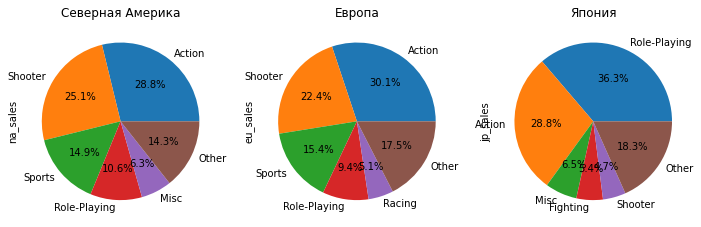

In [51]:
fig, axs=plt.subplots(1,3, figsize=(12,12))
title=['Северная Америка', 'Европа', 'Япония']
for t in range(3):
    df_t=(df_actual.groupby('genre')[region[t]].sum().reset_index().
         sort_values(region[t], ascending=False, ignore_index = True).head(5))
    df_t=df_t.append({'genre':'Other', region[t]: df_actual[region[t]].sum() - df_t[region[t]].sum()},ignore_index=True)
    df_t.plot(kind='pie', y=region[t], legend=False, labels=df_t['genre'],  autopct='%1.1f%%', ax=axs[t], title=title[t]) 
plt.show(); 

В Северной Америке и Европе наиболее популярными жанрами являются "Action" и "Shooter", и состав пятерки лидеров очень похож. В Японии лидирующий по продажам жанр "Role-Plaing", а популярные в Северной Америке и Европе игры жанра "Shooter" в Японии составляют всего 4.7% продаж. Только жанр "Action" одинаково популярен во всех странах.

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

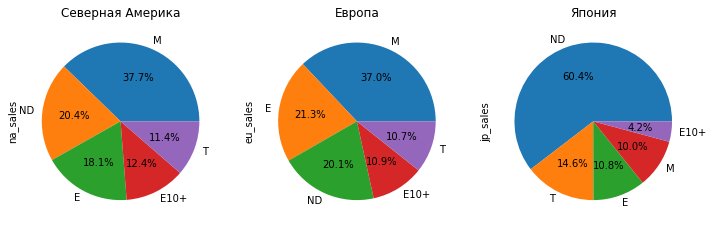

In [52]:
fig, axs=plt.subplots(1,3, figsize=(12,12))
title=['Северная Америка', 'Европа', 'Япония']
for t in range(3):
    df_t=(df_actual.groupby('rating')[region[t]].sum().reset_index().
         sort_values(region[t], ascending=False, ignore_index = True).head(5))
    df_t.plot(kind='pie', y=region[t], legend=False, labels=df_t['rating'],  autopct='%1.1f%%', ax=axs[t], title=title[t]) 
plt.show(); 

Опять для Северной Америки и Европы картина практически идентична - больше всего покупают игр для взрослых "М", на втором универсальные игры рейтинг "Е", так же большую долю составили игры с пропусками в колонке 'rating' (обозначены 'ND'). Для Японии пропуски в колонке 'rating' составляют более 60% всех значений, так как система ESRB предназначена для маркировки игр в США и Канаде и в Японии не распространена. 

## Проверка гипотез

Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки используем t-тест, так как необходимо сравнить средние двух выборок, так же будем считать, что дисперсии выборок равны. 
```
H_0: Средний пользовательский рейтинг "user_score" платформы  Xbox One = средний пользовательский рейтинг "user_score" платформы PC`
H_a: Средний пользовательский рейтинг "user_score" платформы  Xbox One ≠ средний пользовательский рейтинг "user_score" платформы PC`
alpha = 0.05
```

In [53]:
XOne = df_actual.query('platform == "XOne" and user_score != -1')['user_score']
PC = df_actual.query('platform == "PC"  and user_score != -1')['user_score']

results = st.ttest_ind(XOne, PC)

alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
display(df_actual.query('platform in ["XOne", "PC"]')
        .pivot_table(index='platform', values='user_score', aggfunc=['count', 'mean', 'median']))    

0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


,count,mean,median
,user_score,user_score,user_score
platform,,,
PC,189,4.961905,6.0
XOne,247,4.542105,6.0


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для проверки используем t-тест, так как необходимо сравнить средние двух выборок, так же будем считать, что дисперсии выборок равны. 
```
H_0: Средний пользовательский рейтинг "user_score" жанра Action  = средний пользовательский рейтинг "user_score" жанра Sports`
H_a: Средний пользовательский рейтинг "user_score" жанра Action  ≠ средний пользовательский рейтинг "user_score" жанра Sports`
alpha = 0.05
```

In [55]:
Action = df_actual.query('genre == "Action" and user_score != -1')['user_score']
Sports = df_actual.query('genre == "Sports"  and user_score != -1')['user_score']

results = st.ttest_ind(Action, Sports)

alpha = .05
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
display(df_actual.query('genre in ["Action", "Sports"]')
        .pivot_table(index='genre', values='user_score', aggfunc=['count', 'mean', 'median']))    

1.0517832389140023e-27
Отвергаем нулевую гипотезу


,count,mean,median
,user_score,user_score,user_score
genre,,,
Action,766,2.980157,2.90
Sports,214,3.664019,4.35


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Вывод

Мы провели исследование успешности видеоигр на основании интернет-магазина «Стримчик», выполнили предобработку и исследовательский анализ данных, составили портрет пользователя каждого региона, проверили различные гипотезы.
Сделали следующие выводы:
- В период с 1980-2008 год идет рост количества выпущенных игр по всем регионам. После 2008 го идет спад, это связано с широким распространением мобильных телефонов и планшетов и следственно игр на этих устройствах, в том числе и бесплатных, что в свою очередь снизило спрос на компьютерные игры. Период с 1980 по 2008 год для анализа использовать не целесообразно, так как кардинально изменились и условия на рынке компьютерных игр и уровень технологий.
- Средний срок жизни платформы из списка топовых платформ составляет 13 лет, медианный 10, больше всего релизов происходит примерно в средине этого периода, следственно актуальными можно считать платформы не старше 5 лет, которые находятся на пике своей производительности.
- Потенциально прибыльными платформами являются PS4, XOne, PC, 3DS и WiiUб, актуальный период для анализа - с 2013 года, когда все данные платформы уже вышли.
- Наиболее популярной платформой является PS4, на ней выходит много суперхитовых игр с продажами более 2 млн. копий. Не слишком популярная, но зато стабильная платформа PC. 
- Зависимость продаж от отзывов критиков для большинства игр слабая, есть отдельные игры на продажи которых повлияли оценки критиков. Зависимости продаж от оценок пользователей нет. Не все пользователи пишут отзывы и ставят оценки, не все и руководствуются чьими либо оценками для выбора игры. Так же есть полюбившиеся пользователям серии на подобие Call of Duty, Final fantasy или FIFA, релизы которых пользователи ждут и купят независимо от оценок пользователей и критиков.
- Самым прибыльным жанром можно считать жанр "Shooter", в пятерке самых продаваемых игр этого жанра видим легендарную "Call of Duty", следующий по продажам жанр "Sports", в этом жанре всю пятерку лидеров занимает "FIFA". Наименее продаваемые игры принадлежат к жанру "Adventure". Предполагаю, что лидерство игр жанра "Shooter" вызвано психологическим фактором, так как 'стрелялки' хороший способ снять стресс.
- В Северной Америке по продажам лидируют PS4, производства японской компании Sony, XOne от американской компании ХBOX, в  европейском регионе безусловный лидер тоже PS4.  В Японии же почти половина всех продаж приходится на 3DS, а популярный в Европе и Америке PS4 на 4м месте, хотя и Nintendo и Sony японские компании, возможно это связано с тем, что PS4 относительно новая платформа в сравнении с 3DS. Игры американской компании XBOX вообще не вошли в японский топ-5.
- В Северной Америке и Европе наиболее популярными жанрами являются "Action" и "Shooter", и состав пятерки лидеров очень похож. В Японии лидирующий по продажам жанр "Role-Plaing", а популярные в Северной Америке и Европе игры жанра "Shooter" в Японии составляют всего 4.7% продаж. Только жанр "Action" одинаково популярен во всех странах.
- В Северной Америке и Европе - больше всего покупают игр для взрослых "М", на втором универсальные игры рейтинг Е, так же большую долю составили игры с пропусками в колонке 'rating' (обозначены 'ND'). Для Японии пропуски в колонке 'rating' составляют более 60% всех значений, так как система ESRB предназначена для маркировки игр в США и Канаде и в Японии не распространена.
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Для Европы и Северной Америки будет целесообразно провести рекламную компанию для игр платформ PS4 и XOne, жанра "Shooter", рейтинг М (ERSB). Для Японии стоит вложить рекламный бюджет в игры платформ 3DS и PS4, жанра "Role-Playing" либо "Action". Оценки критиков стоит учитывать, как дополнительный критерий. Оценки пользователей можно не учитывать.